# Download Sentinel data

Morten Dam Jorgensen <mdj@mdj.dk>

This notebook illustrates how to download data for Ship detection.

To generate GeoJSON files, visit http://www.marineregions.org/gazetteer.php?p=details&id=8438 for ShapeFiles. These are too complex for the Science Hub. Use QGIS to manually draw a simplifed region.

Sentinelsat API: https://github.com/sentinelsat/sentinelsat/blob/master/docs/api.rst

In [1]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import os

import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# connect to the API
api = SentinelAPI(os.environ['DHUS_USER'], os.environ['DHUS_PASSWORD'], os.environ['DHUS_URL'])

## Tag region - overlapping with AIS data

In [ ]:
api.query(filename="S1A_IW_SLC__1SDV_20181006T054021_20181006T054048_024011_029F96_1702*")

In [78]:

# search by polygon, time, and Hub query keywords
footprint = geojson_to_wkt(read_geojson('../regions/eez_dk_simple.geojson'))

products = api.query(footprint,
#                      date = ('20181006', date(2018, 6, 10)),
                     date = ('NOW-7DAYS', 'NOW'),
                     platformname = 'Sentinel-1', producttype='SLC')

print("Number of products found: %s" % len(products))

Number of products found: 42


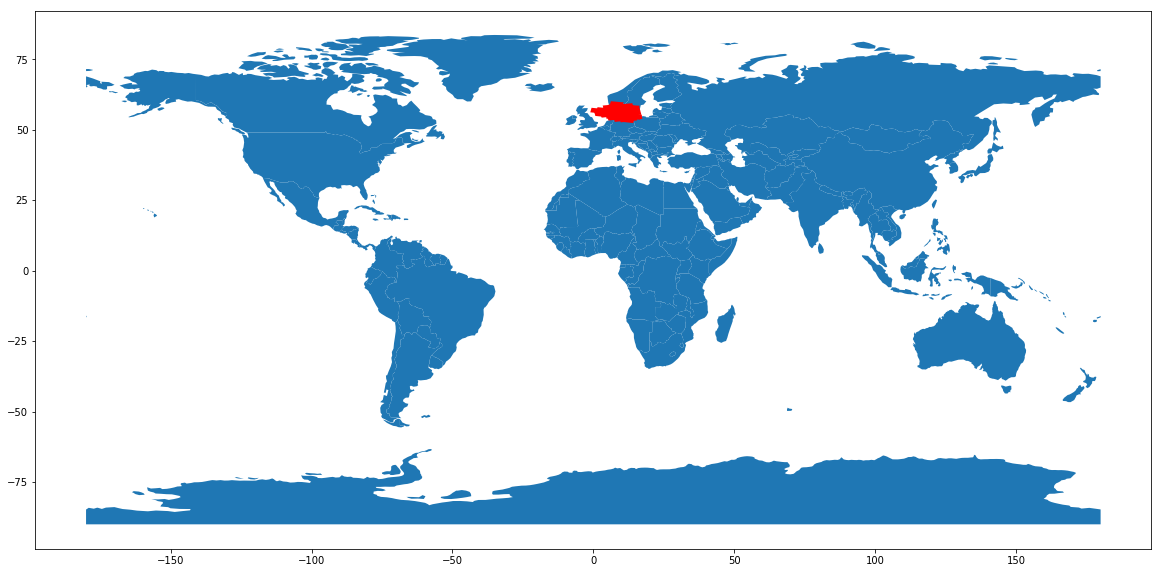

In [79]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
wbase = world.plot()
api.to_geodataframe(products).plot(ax=wbase, color="red")

In [ ]:
# download single scene by known product id
api.download(<product_id>)

# search by polygon, time, and Hub query keywords
footprint = geojson_to_wkt(read_geojson('map.geojson'))
products = api.query(footprint,
                     date = ('20151219', date(2015, 12, 29)),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 30))

# download all results from the search
api.download_all(products)

# GeoJSON FeatureCollection containing footprints and metadata of the scenes
api.to_geojson(products)

# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
api.to_geodataframe(products)

# Get basic information about the product: its title, file size, MD5 sum, date, footprint and
# its download url
api.get_product_odata(<product_id>)

# Get the product's full metadata available on the server
api.get_product_odata(<product_id>, full=True)

## Probe region - operational data where no AIS data is available

In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [54]:

# search by polygon, time, and Hub query keywords
footprint = geojson_to_wkt(read_geojson('../regions/eez_greenland_simple.geojson'))

products = api.query(footprint,
                     date = ('20151219', date(2015, 12, 29)),
                     platformname = 'Sentinel-1')

print("Number of products found: %s" % len(products))

Querying products: 100%|██████████| 1281/1281 [00:21<00:00, 40.66 products/s]


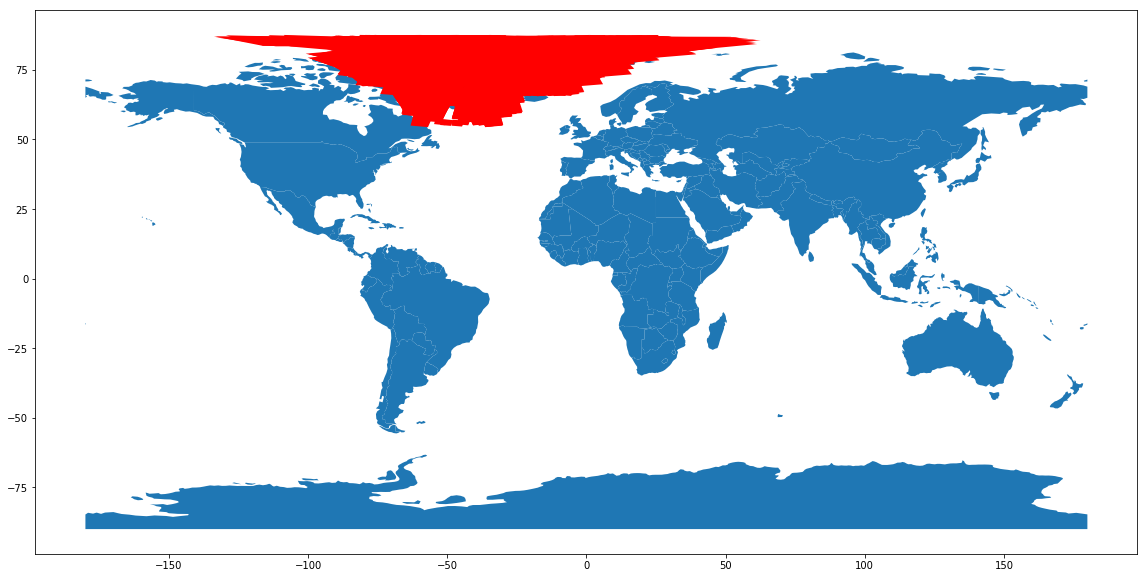

In [55]:
wbase = world.plot()
api.to_geodataframe(products).plot(ax=wbase, color="red")

1281